In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [47]:
model_path = "checkpoints/animal_model_4_200.keras"
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │        92,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,309,136 (165.21 MB)

 Trainable params: 9,531,482 (36.36 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 19,062,966 (72.72 MB)

In [71]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model_path = "checkpoints/animal_model_4_200.keras"
model = tf.keras.models.load_model(model_path)

# Load label map
label_map = json.load(open("labels.json"))

# Preprocess images in batches
data_path = "infer"
image_paths = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(('.jpg', '.png'))]

images = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)  # Correct preprocessing
    images.append(img_array)

# Convert list of images to a NumPy array
images_batch = np.array(images)

# Predict on the batch
res = model.predict(images_batch, verbose=1)

# Process predictions
predictions = np.argmax(res, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Image: infer/733e36d245.jpg
Predicted class: 18
Predicted label: dog
Image: infer/0d0d6d90d8.jpg
Predicted class: 9
Predicted label: cat
Image: infer/2f7c6c7cd5.jpg
Predicted class: 44
Predicted label: ladybugs
Image: infer/74d55d6d41.jpg
Predicted class: 50
Predicted label: moth
Image: infer/0cfaf08fce.jpg
Predicted class: 18
Predicted label: dog
Image: infer/1a2dce7848.jpg
Predicted class: 18
Predicted label: dog
Image: infer/1f016e1910.jpg
Predicted class: 9
Predicted label: cat
Image: infer/0b54dde5f5.jpg
Predicted class: 9
Predicted label: cat
Image: infer/0c3d04bcf5.jpg
Predicted class: 8
Predicted label: butterfly
Image: infer/2a40de8365.jpg
Predicted class: 9
Predicted label: cat
Image: infer/2d7dc1ddb5.jpg
Predicted class: 20
Predicted label: donkey


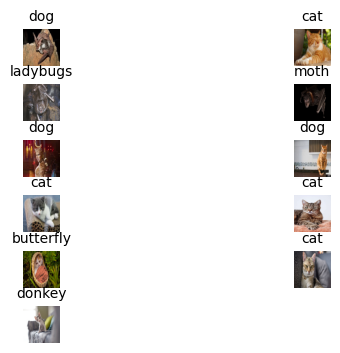

In [ ]:
import math

# Display results
for i, pred in enumerate(predictions):
    print(f"Image: {image_paths[i]}")
    print(f"Predicted class: {pred}")
    print(f"Predicted label: {label_map[str(pred)]}")

# Optional: Visualize predictions
for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(math.ceil(len(image_paths)/5), 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_map[str(predictions[i])], fontsize=10)

# Add padding between rows
plt.subplots_adjust(hspace=0.5)
plt.show()